<a href="https://colab.research.google.com/github/ChintzRuparel/Image-Processing/blob/main/IP_Expt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IP-Experiment no. 03 : IMAGE ENHANCEMENT

Aim: <br>
a. For the given test image, apply power law transformation with gamma <br>
b.For the given low contrast image, apply thresholding and contrast stretching point processing techniques to enhance the image.

## Power-law (gamma) transformations can be mathematically expressed as $s = cr^{\gamma}$

 Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. <br>
 If, s is the output intensity, an r is the input intensity of the pixel, and $\gamma$ is the intensity correction factor


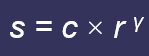

Text(0.5, 1.0, 'Binary Image')

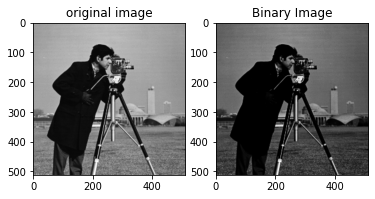

In [3]:

img=io.imread('cameraman.tif')
r,c = img.shape
I=img.copy()
gamma=2
for i in range(r):
  for j in range(c):
    img[i,j]=((img[i,j]/255)**gamma)*255

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary Image')















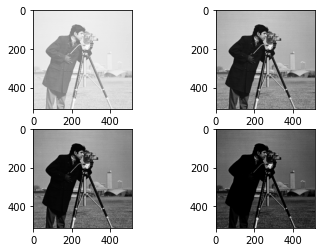

In [6]:

img=io.imread('cameraman.tif')
r,c=img.shape
i=1
for gamma in [0.2,0.8,1.2,2.2]:
  output=np.array((((img/255)**gamma)*255),dtype='uint8')
  plt.subplot(2,2,i)
  plt.imshow(output,cmap='gray')
  i=i+1































  

Students have to comment on the enhancement results obtained for gamma less than 1 and gamma > 1

# Thresholding

Thresholding: is simplest method of segmentation in order to isolate the object from the background <br>



#Equation to implement thresholding
 s=L-1 for r > threshold<br> 
and s= 0 for r < threshold

Enter threshhold=128


Text(0.5, 1.0, 'Binary Image')

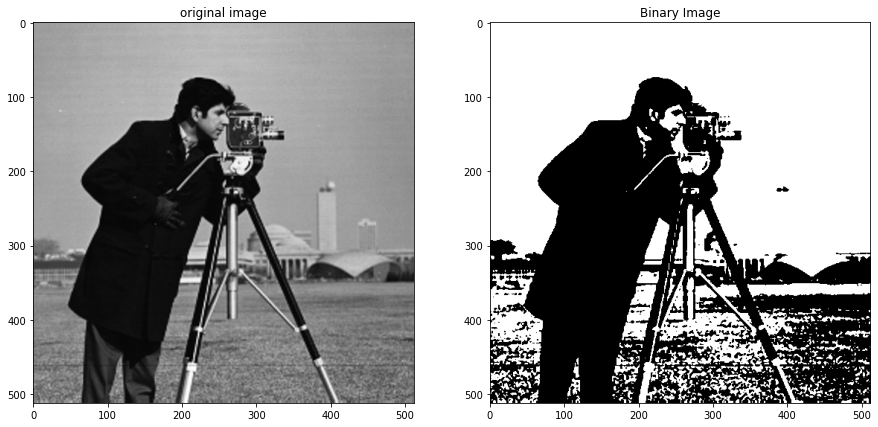

In [4]:

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
img=io.imread('cameraman.tif')
r,c = img.shape
t= int(input('Enter threshhold='))
I=img.copy()
for i in range(r):
  for j in range(c):
    if img[i,j] > t:
      img[i,j]=255
    else:
      img[i,j]=0


plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary Image')

Digital Negative


Text(0.5, 1.0, 'Binary Image')

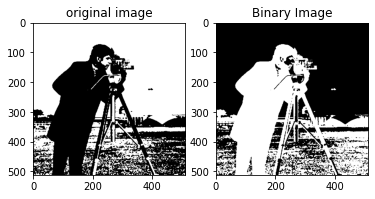

In [5]:
cimg=io.imread('cameraman.tif')
r,c = img.shape
I=img.copy()
for i in range(r):
  for j in range(c):
    img[i,j]=255-img[i,j]

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary Image')

# Contrast stretching using Piecewise-Linear Transformation Functions<br>

Concept:<br>
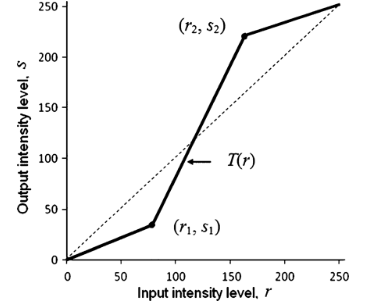

With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels <br>
Contrast stretching decreases the intensity of the dark pixels and increases the intensity of the light pixels. <br>
If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect).

# Equation for contrast Stretching to be implemented

$Slope 1 = (s1-0)/(r1-0)$<br>
$Slope 2 = (s2-s1)/(r2-r1)$<br>
$Slope 3 = (255-s2)/(255-r2)$<br>

$Input pixel = r$ <br>
$Output pixel, S $<br>

S = Slope1.r,                 0 $\le$ r $\le$ r1<br>
  = Slope 2.(r-r1)+s1,        r1$\le$r$\le$r2<br>
  = Slope3 (r-r2)+s2,         r2$\le$r$\le$L-1  



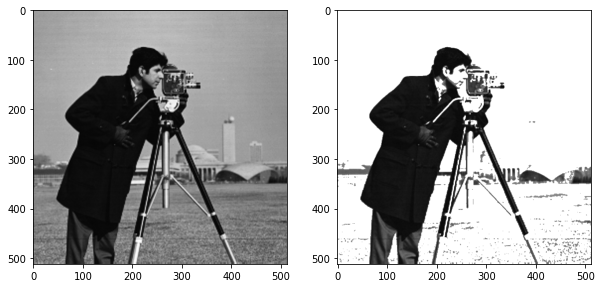

Plot the figures for thresholding and contrast stretching

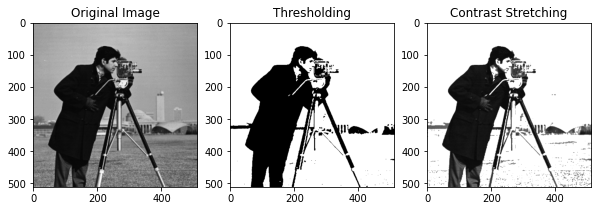

Comment on the comparison and performance of both the techniques. 

# Conclusion